<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-GRACILE-data" data-toc-modified-id="Load-GRACILE-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load GRACILE data</a></span></li><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data processing</a></span><ul class="toc-item"><li><span><a href="#GRACILE" data-toc-modified-id="GRACILE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>GRACILE</a></span></li><li><span><a href="#CMAM" data-toc-modified-id="CMAM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CMAM</a></span></li></ul></li><li><span><a href="#Figure-4" data-toc-modified-id="Figure-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Figure 4</a></span></li></ul></div>

# Import libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import xarray.ufuncs as xrf
import numpy as np
import matplotlib as mpl
import glob
from matplotlib.offsetbox import AnchoredText

In [2]:
%reload_ext watermark
%watermark --iversions -v -m

matplotlib 3.1.2
numpy      1.17.3
xarray     0.14.1
CPython 3.6.9
IPython 7.1.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-96-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# Load GRACILE data

In [20]:
inpath_gracile= '/mnt/4data/GRACILE/'

In [21]:
ds = xr.open_dataset(f'{inpath_gracile}GRACILE_HIRDLS_SABER_GW_climatology.nc')

# Data processing

## GRACILE

In [22]:
da_hirdls = xr.Dataset()
da_hirdls['upper'] = ds.gwmf_zav_clim_max_HIRDLS_Pa*1000.
da_hirdls['lower'] = ds.gwmf_zav_clim_min_HIRDLS_Pa*1000.
da_hirdls['mid'] = ds.gwmf_zav_clim_HIRDLS_Pa*1000.
da_hirdls.attrs['units'] = 'mPa'
da_hirdls = da_hirdls.rename({'n_cal_months': 'month', 'n_z_grid_zav_HIRDLS': 'plev', 'n_lat_grid_zav_HIRDLS': 'lat'})
da_hirdls['month'] = np.arange(1,13)
da_hirdls['plev'] = ds.z_grid_zav_HIRDLS.values*1000
da_hirdls['lat'] = ds.lat_grid_zav_HIRDLS.values
da_hirdls

<xarray.Dataset>
Dimensions:  (lat: 73, month: 12, plev: 31)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * plev     (plev) float64 2e+04 2.1e+04 2.2e+04 ... 4.8e+04 4.9e+04 5e+04
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    upper    (month, plev, lat) float32 nan nan nan nan nan ... nan nan nan nan
    lower    (month, plev, lat) float32 nan nan nan nan nan ... nan nan nan nan
    mid      (month, plev, lat) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    units:    mPa

In [23]:
da_saber = xr.Dataset()
da_saber['upper'] = ds.gwmf_zav_clim_max_SABER_Pa*1000.
da_saber['lower'] = ds.gwmf_zav_clim_min_SABER_Pa*1000.
da_saber['mid'] = ds.gwmf_zav_clim_SABER_Pa*1000.
da_saber.attrs['units'] = 'mPa'
da_saber = da_saber.rename({'n_cal_months': 'month', 'n_z_grid_zav_SABER': 'plev', 'n_lat_grid_zav_SABER': 'lat'})
da_saber['month'] = np.arange(1,13)
da_saber['plev'] = ds.z_grid_zav_SABER.values*1000
da_saber['lat'] = ds.lat_grid_zav_SABER.values
da_saber

<xarray.Dataset>
Dimensions:  (lat: 37, month: 12, plev: 61)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * plev     (plev) float64 3e+04 3.1e+04 3.2e+04 ... 8.8e+04 8.9e+04 9e+04
  * lat      (lat) float32 -90.0 -85.0 -80.0 -75.0 -70.0 ... 75.0 80.0 85.0 90.0
Data variables:
    upper    (month, plev, lat) float32 nan nan 0.3353113 ... nan nan nan
    lower    (month, plev, lat) float32 nan nan 0.17288351 ... nan nan nan
    mid      (month, plev, lat) float32 nan nan 0.2527599 ... nan nan nan
Attributes:
    units:    mPa

## CMAM

In [39]:
def get_var(invar, s_year, e_year, what = 'climatology'):
    inpath_root = '/mnt/4data/CMAM/0A.daily/' 
    inpath_root = f'{inpath_root}{invar}/log_coord/'   

    ds = xr.open_dataset(f'{inpath_root}{invar}_logH_{what}_{s_year}_{e_year}.nc')
    #print(ds[invar])
    mean = ds[invar].mean('lon')*1000.
    ds_out = xr.Dataset()
    ds_out['mean'] = mean
    return ds_out

def get_cmam_data(s_year, e_year, sel_dict, what = 'climatology'):
    
    
    zon = get_var('ogwfluxe', s_year, e_year, what)  
    mer = get_var('ogwfluxn', s_year, e_year, what)  
    abs_cmam_o = xrf.fabs(zon**2+mer**2)
    
    zon = get_var('nogwfluxe', s_year, e_year, what)  
    mer = get_var('nogwfluxn', s_year, e_year, what)
    abs_cmam_n = xrf.fabs(zon**2+mer**2)
    
    total = abs_cmam_n + abs_cmam_o

    return total.sel(**sel_dict) #abs_cmam_n.sel(**sel_dict), abs_cmam_o.sel(**sel_dict)

def plot_w_unc(ax, da, color, label):
    ax.fill_between(da.lat.values, da.lower.values, \
                 da.upper.values, color = color, alpha = 0.7)
    ax.plot(da.lat.values, da.mid.values, color = color, label = label, lw = 3)

In [40]:
months = [11,12,1,2,3] #
#months = [6,7,8]
months = [12,1,2]#[11,12,1,2,3] # [12,1,2]#
sel_dict = dict(plev = [30000,20000], month = months, lat = slice(0,None)) #[11,12,1,2,3]
s_year = '2005-03'
e_year = '2008-02'
total = get_cmam_data(s_year, e_year, sel_dict).load()
s_year2 = '2002-02'
e_year2 = '2010-12'
total2 = get_cmam_data(s_year2, e_year2, sel_dict).load()

# Figure 4

0 {'plev': 30000.0, 'month': 12}
1 {'plev': 30000.0, 'month': 1}
2 {'plev': 30000.0, 'month': 2}
3 {'plev': 20000.0, 'month': 12}
4 {'plev': 20000.0, 'month': 1}
5 {'plev': 20000.0, 'month': 2}


Text(0.1, -0.3, 'latitude [deg]')

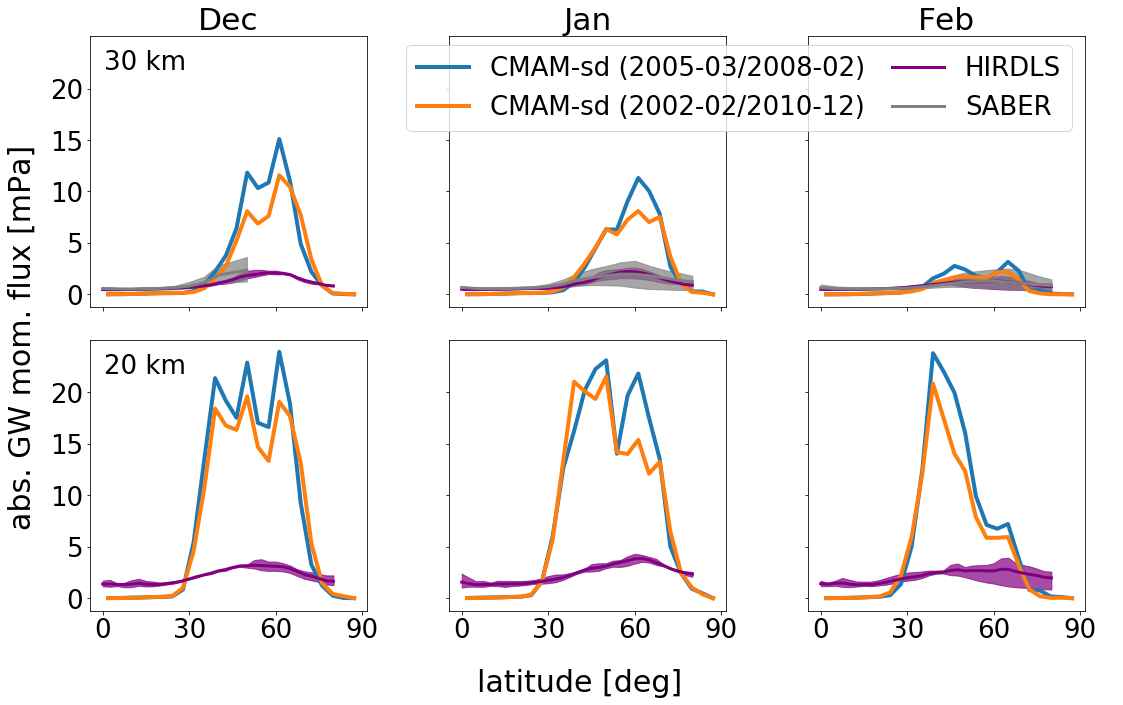

In [36]:
mpl.rcParams.update({'font.size': 26})
fs = 30


p = total['mean'].plot.line(x = 'lat', \
                      col = 'month', \
                      row = 'plev',  size=5,\
                      lw = 4, \
                      label = f'CMAM-sd ({s_year}/{e_year})')

s_year2 = '2002-02'
e_year2 = '2010-12'
p.data = total2['mean']
p.map(plt.plot, 'lat', Ellipsis, lw = 4, \
      label = f'CMAM-sd ({s_year2}/{e_year2})')

j=0
row_labels = ['30 km', '20 km']
month_title_ls = ['Dec', 'Jan', 'Feb'] #['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
for i, (ax, sel_dict) in enumerate(zip(p.axes.flatten(), p.name_dicts.flatten())):
    #sel_dict['plev'] = int(sel_dict['plev'])
    print(i, sel_dict)
    sel_dict['lat'] = slice(0,None)
    if sel_dict['plev'] != 20000:
        plot_w_unc(ax, da_hirdls.sel(**sel_dict), 'purple', 'HIRDLS')
        plot_w_unc(ax, da_saber.sel(**sel_dict), 'gray', 'SABER')
        ax.set_title(month_title_ls[i])


        if i ==2: # 4
            ax.legend(bbox_to_anchor=(-1.5, 0.6, 2.5, .302), loc=3,
       ncol=2, mode="expand")
        
    else:
        plot_w_unc(ax, da_hirdls.sel(**sel_dict), 'purple', 'HIRDLS')

        
    ax.set_ylabel('')
    ax.set_xlabel('')    
    ax.set_yticks([0,5,10,15,20])
    ax.set_xticks([0,30,60,90])
    
    # it overplots row titles
    if i in [2,5]:
        ax.annotate('                       ', xy=(1.02, 0.5), xycoords="axes fraction", \
                rotation=270, ha="left", va="center", bbox=dict(fc="white", ec = "white")) 
    if i % 3 == 0:
        # see https://matplotlib.org/gallery/userdemo/annotate_explain.html#sphx-glr-gallery-userdemo-annotate-explain-py
        ax.text(.05, .95, row_labels[j], transform=ax.transAxes, ha="left", va="top")
        j+=1
    
ax = p.axes[0][0]
ax.text(-0.3,-0.8,'abs. GW mom. flux [mPa]', fontdict=dict(fontsize = fs), rotation = 90, transform=ax.transAxes)
ax = p.axes[1][1]
ax.text(0.1,-0.3,'latitude [deg]', fontdict=dict(fontsize = fs), transform=ax.transAxes)
#plt.savefig('CMAM_vs_GRACILE_DJF.pdf', bbox_inches = 'tight')